In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Loading in csv files:

In [22]:
humidity_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/humidity.csv", col_types = cols())
pressure_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/pressure.csv", col_types = cols())
temperature_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/temperature.csv", col_types = cols())
wind_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/wind_speed.csv", col_types = cols())
description_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/weather_description.csv", col_types = cols())

Selecting Vancouver columns

In [5]:
humidity_van = select(humidity_data, datetime, Vancouver)
pressure_van = select(pressure_data, datetime, Vancouver)
temperature_van = select(temperature_data, datetime, Vancouver)
wind_van = select(wind_data, datetime, Vancouver)
description_van = select(description_data, datetime, Vancouver)

Merge Datasets

In [91]:
weather_data_verbose = left_join(humidity_van, pressure_van, by = "datetime") %>%
                left_join(temperature_van, by = "datetime") %>%
                left_join(wind_van, by = "datetime") %>%
                left_join(description_van, by = "datetime") %>%
                `colnames<-`(c("datetime", "humidity.pct", "pressure.kpa", "temperature.c", "wind_speed.ms", "description")) %>%
                na.omit() %>%
                mutate(temperature.c = temperature.c - 273.15)

weather_data_verbose
summary(weather_data_verbose)

datetime,humidity.pct,pressure.kpa,temperature.c,wind_speed.ms,description
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2012-10-02 09:00:00,87,807,11.44022,0,broken clouds
2012-10-02 10:00:00,88,849,11.43817,0,broken clouds
2012-10-02 11:00:00,89,890,11.43613,0,broken clouds
2012-10-02 12:00:00,89,932,11.43409,0,broken clouds
2012-10-02 13:00:00,90,973,11.43204,0,broken clouds
2012-10-02 14:00:00,91,1015,11.43000,0,sky is clear
2012-10-02 15:00:00,89,1027,11.70000,0,sky is clear
2012-10-02 16:00:00,76,1015,13.11000,0,sky is clear
2012-10-02 17:00:00,76,1014,13.62000,0,sky is clear


    datetime                    humidity.pct     pressure.kpa  temperature.c   
 Min.   :2012-10-02 09:00:00   Min.   : 12.00   Min.   : 807   Min.   :-28.00  
 1st Qu.:2014-05-05 11:45:00   1st Qu.: 73.00   1st Qu.:1012   1st Qu.:  6.49  
 Median :2015-07-02 16:30:00   Median : 86.00   Median :1017   Median : 10.89  
 Mean   :2015-06-26 22:20:33   Mean   : 81.86   Mean   :1018   Mean   : 11.12  
 3rd Qu.:2016-08-28 21:15:00   3rd Qu.: 93.00   3rd Qu.:1022   3rd Qu.: 15.87  
 Max.   :2017-10-28 00:00:00   Max.   :100.00   Max.   :1100   Max.   : 33.85  
 wind_speed.ms    description       
 Min.   : 0.000   Length:40624      
 1st Qu.: 1.000   Class :character  
 Median : 2.000   Mode  :character  
 Mean   : 2.544                     
 3rd Qu.: 4.000                     
 Max.   :25.000                     

In [92]:
weather_data = weather_data_verbose %>% 
            filter(description != 'volcanic ash' & description != 'dust' & description != 'smoke' & description != 'haze') %>%
            mutate(description = case_when(description %in% c('broken clouds', 'few clouds', 'overcast clouds', 'scattered clouds') ~ 'cloudy',
                                           description %in% c('heavy intensity rain', 'heavy intensity shower rain', 'very heavy rain') ~ 'heavy rain',
                                           description %in% c('drizzle', 'light intensity drizzle', 'light intensity drizzle rain', 'light intensity shower rain', 'light rain and snow') ~ 'light rain',
                                           description %in% c('heavy shower snow', 'light shower snow', 'heavy snow', 'light snow', 'shower snow', 'sleet', 'light shower sleet') ~ 'snow',
                                           description %in% c('proximity thunderstorm', 'ragged thunderstorm', 'thunderstorm with heavy rain', 'thunderstorm with light rain', 'thunderstorm with rain') ~ 'thunderstorm',
                                           description %in% c('proximity shower rain', 'shower rain') ~ 'moderate rain',
                                           description == 'mist' ~ 'fog',
                                           description == 'sky is clear' ~ 'clear sky',
                                           TRUE ~ description)) %>%
            mutate(description = as.factor(description))
            

head(weather_data)

levels(pull(weather_data, description))

datetime,humidity.pct,pressure.kpa,temperature.c,wind_speed.ms,description
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2012-10-02 09:00:00,87,807,11.44022,0,cloudy
2012-10-02 10:00:00,88,849,11.43817,0,cloudy
2012-10-02 11:00:00,89,890,11.43613,0,cloudy
2012-10-02 12:00:00,89,932,11.43409,0,cloudy
2012-10-02 13:00:00,90,973,11.43204,0,cloudy
2012-10-02 14:00:00,91,1015,11.43000,0,clear sky
2012-10-02 15:00:00,89,1027,11.70000,0,clear sky
2012-10-02 16:00:00,76,1015,13.11000,0,clear sky
2012-10-02 17:00:00,76,1014,13.62000,0,clear sky


[1] "clear sky"     "cloudy"        "fog"           "heavy rain"   
[5] "light rain"    "moderate rain" "snow"          "thunderstorm"

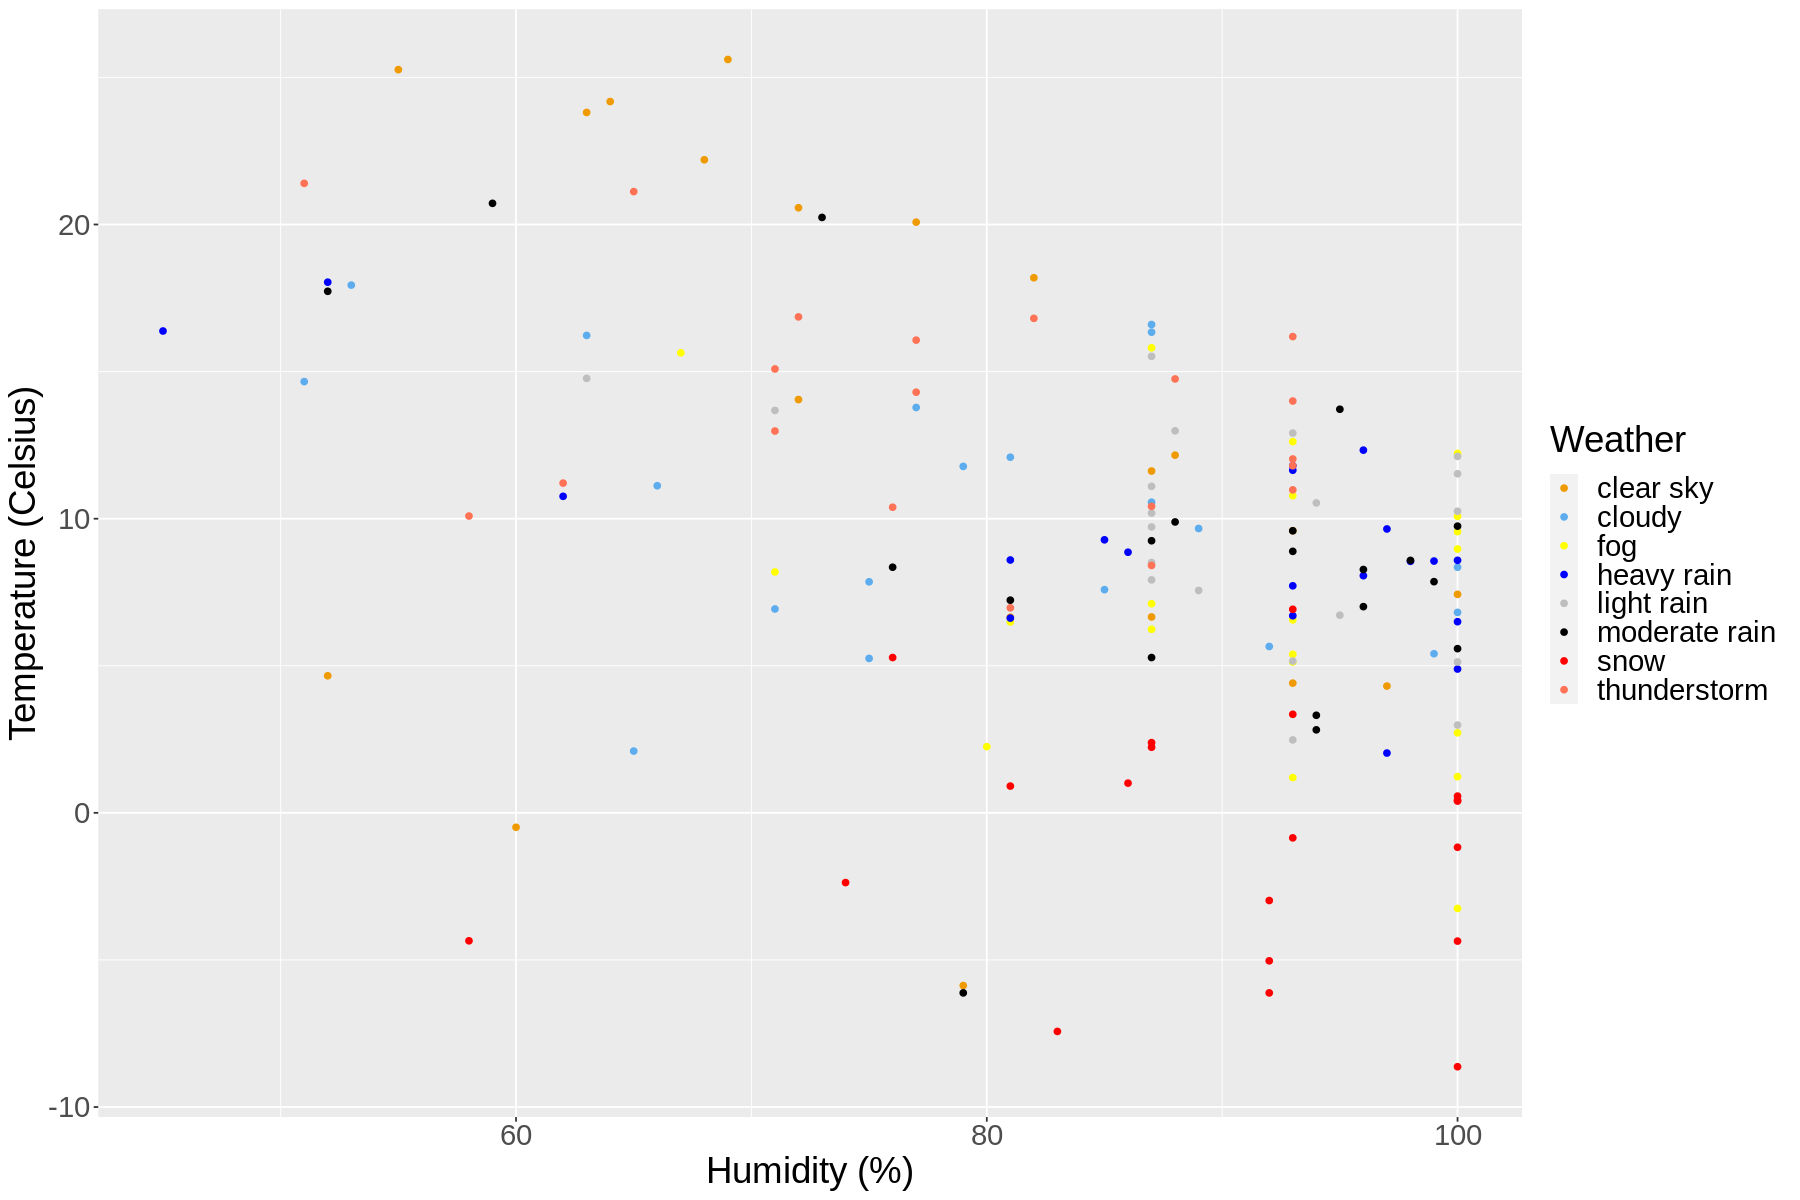

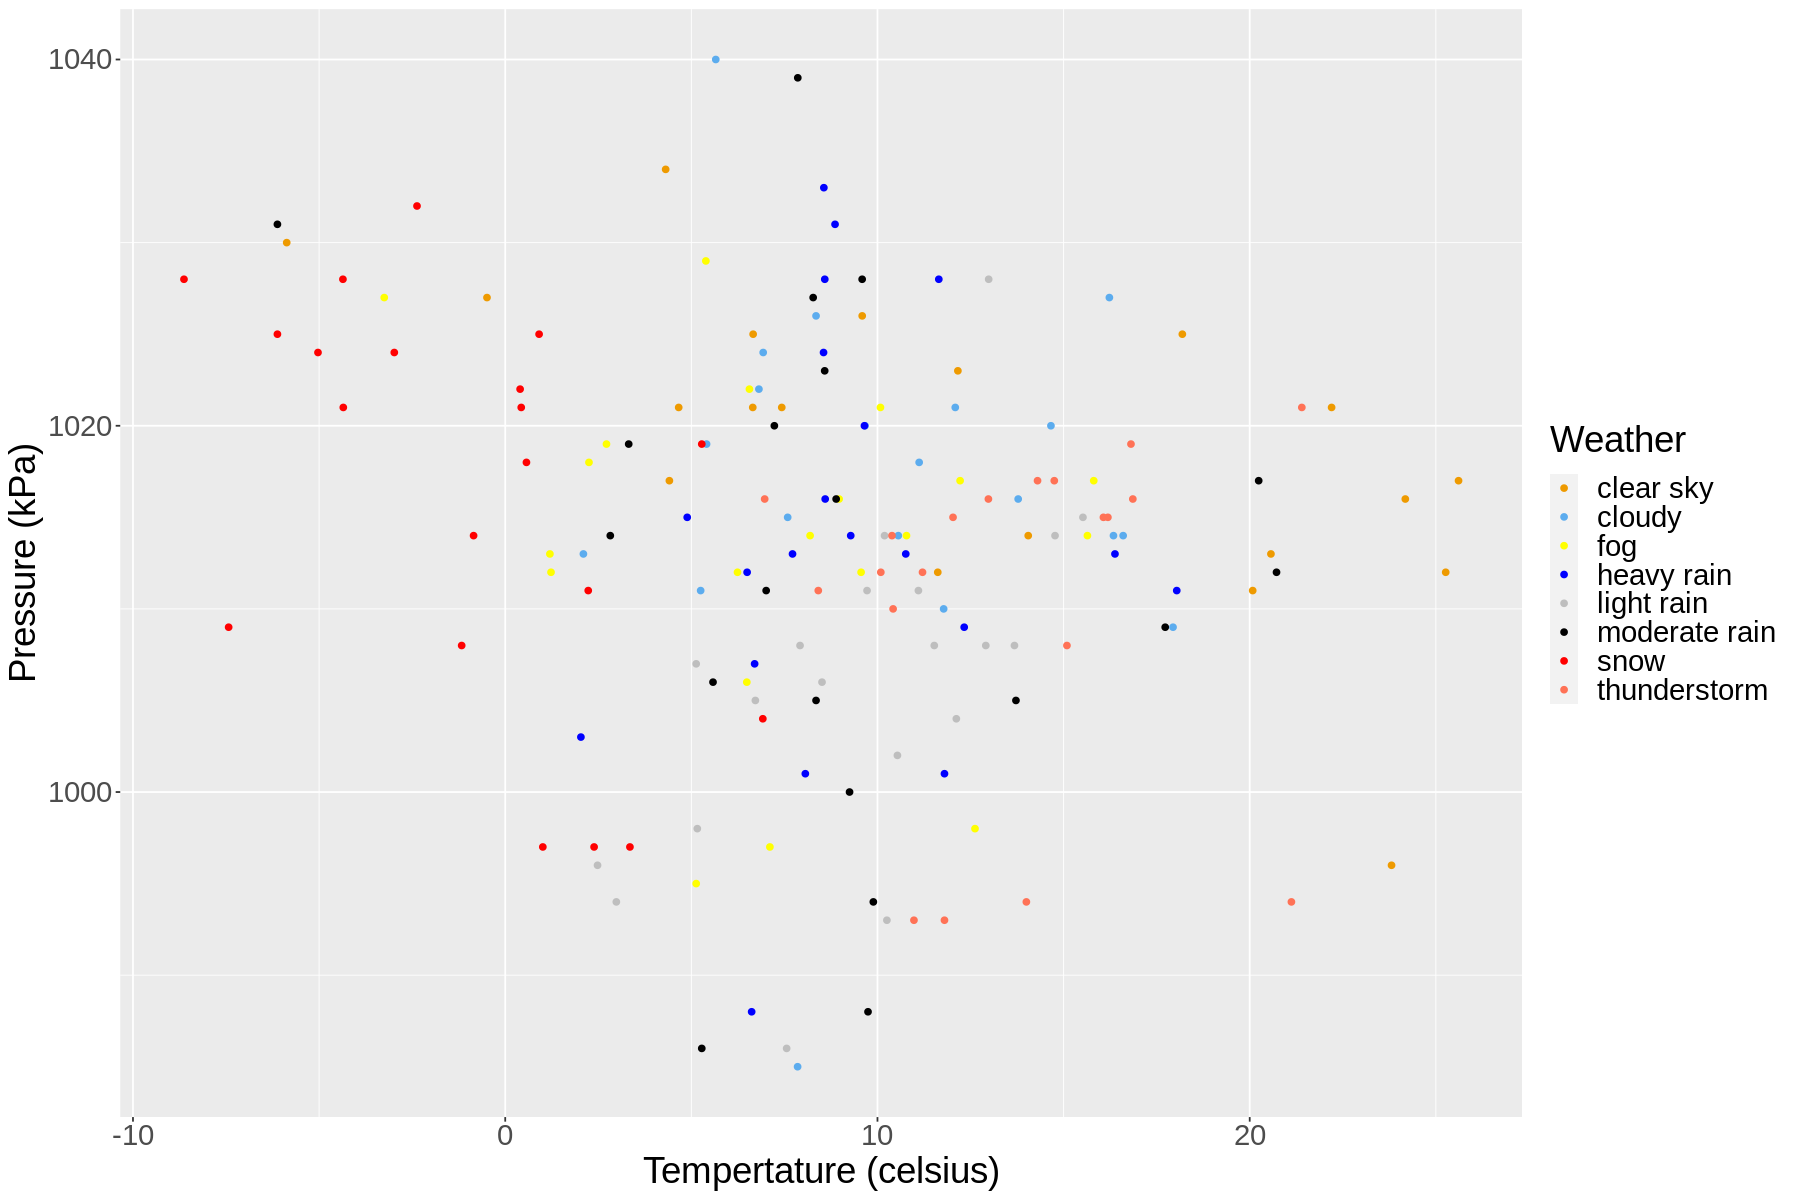

In [45]:
clear_sky <- weather_data %>%
            filter(description == "clear sky")
clear_sky = sample_n(clear_sky, 20)

cloudy <- weather_data %>%
            filter(description == "cloudy")
cloudy = sample_n(cloudy, 20)

fog <- weather_data %>%
            filter(description == "fog")
fog = sample_n(fog, 20)

heavy_rain <- weather_data %>%
            filter(description == "heavy rain")
heavy_rain = sample_n(heavy_rain, 20)

light_rain <- weather_data %>%
            filter(description == "light rain")
light_rain = sample_n(light_rain, 20)

moderate_rain <- weather_data %>%
            filter(description == "moderate rain")
moderate_rain = sample_n(moderate_rain, 20)

snow <- weather_data %>%
            filter(description == "snow")
snow = sample_n(snow, 20)

thunderstorm <- weather_data %>%
            filter(description == "thunderstorm")
thunderstorm = sample_n(thunderstorm, 20)

rbind_data <- rbind(clear_sky, cloudy, fog, heavy_rain, light_rain, moderate_rain, snow, thunderstorm)

options(repr.plot.width = 15, repr.plot.height = 10) 

weather_data_plot_temp_vs_hum <- rbind_data %>%
  ggplot(aes(x = humidity.pct, y = temperature.c, color = description)) +
  geom_point(alpha = 4.0) +
  labs(x = "Humidity (%)", 
       y = "Temperature (Celsius)",
       color = "Weather") +
  scale_color_manual(labels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm"), 
                     values = c("orange2", "steelblue2", "yellow", "blue", "grey", "grey0", "red", "coral1")) +
  theme(text = element_text(size = 22))
weather_data_plot_temp_vs_hum

weather_data_plot_temp_vs_prs <- rbind_data %>%
  ggplot(aes(x = temperature.c, y = pressure.kpa, color = description)) +
  geom_point(alpha = 4.0) +
  labs(x = "Tempertature (celsius)", 
       y = "Pressure (kPa)",
       color = "Weather") +
  scale_color_manual(labels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm"), 
                     values = c("orange2", "steelblue2", "yellow", "blue", "grey", "grey0", "red", "coral1")) +
  theme(text = element_text(size = 22))
weather_data_plot_temp_vs_prs

Raw Temp vs humidity

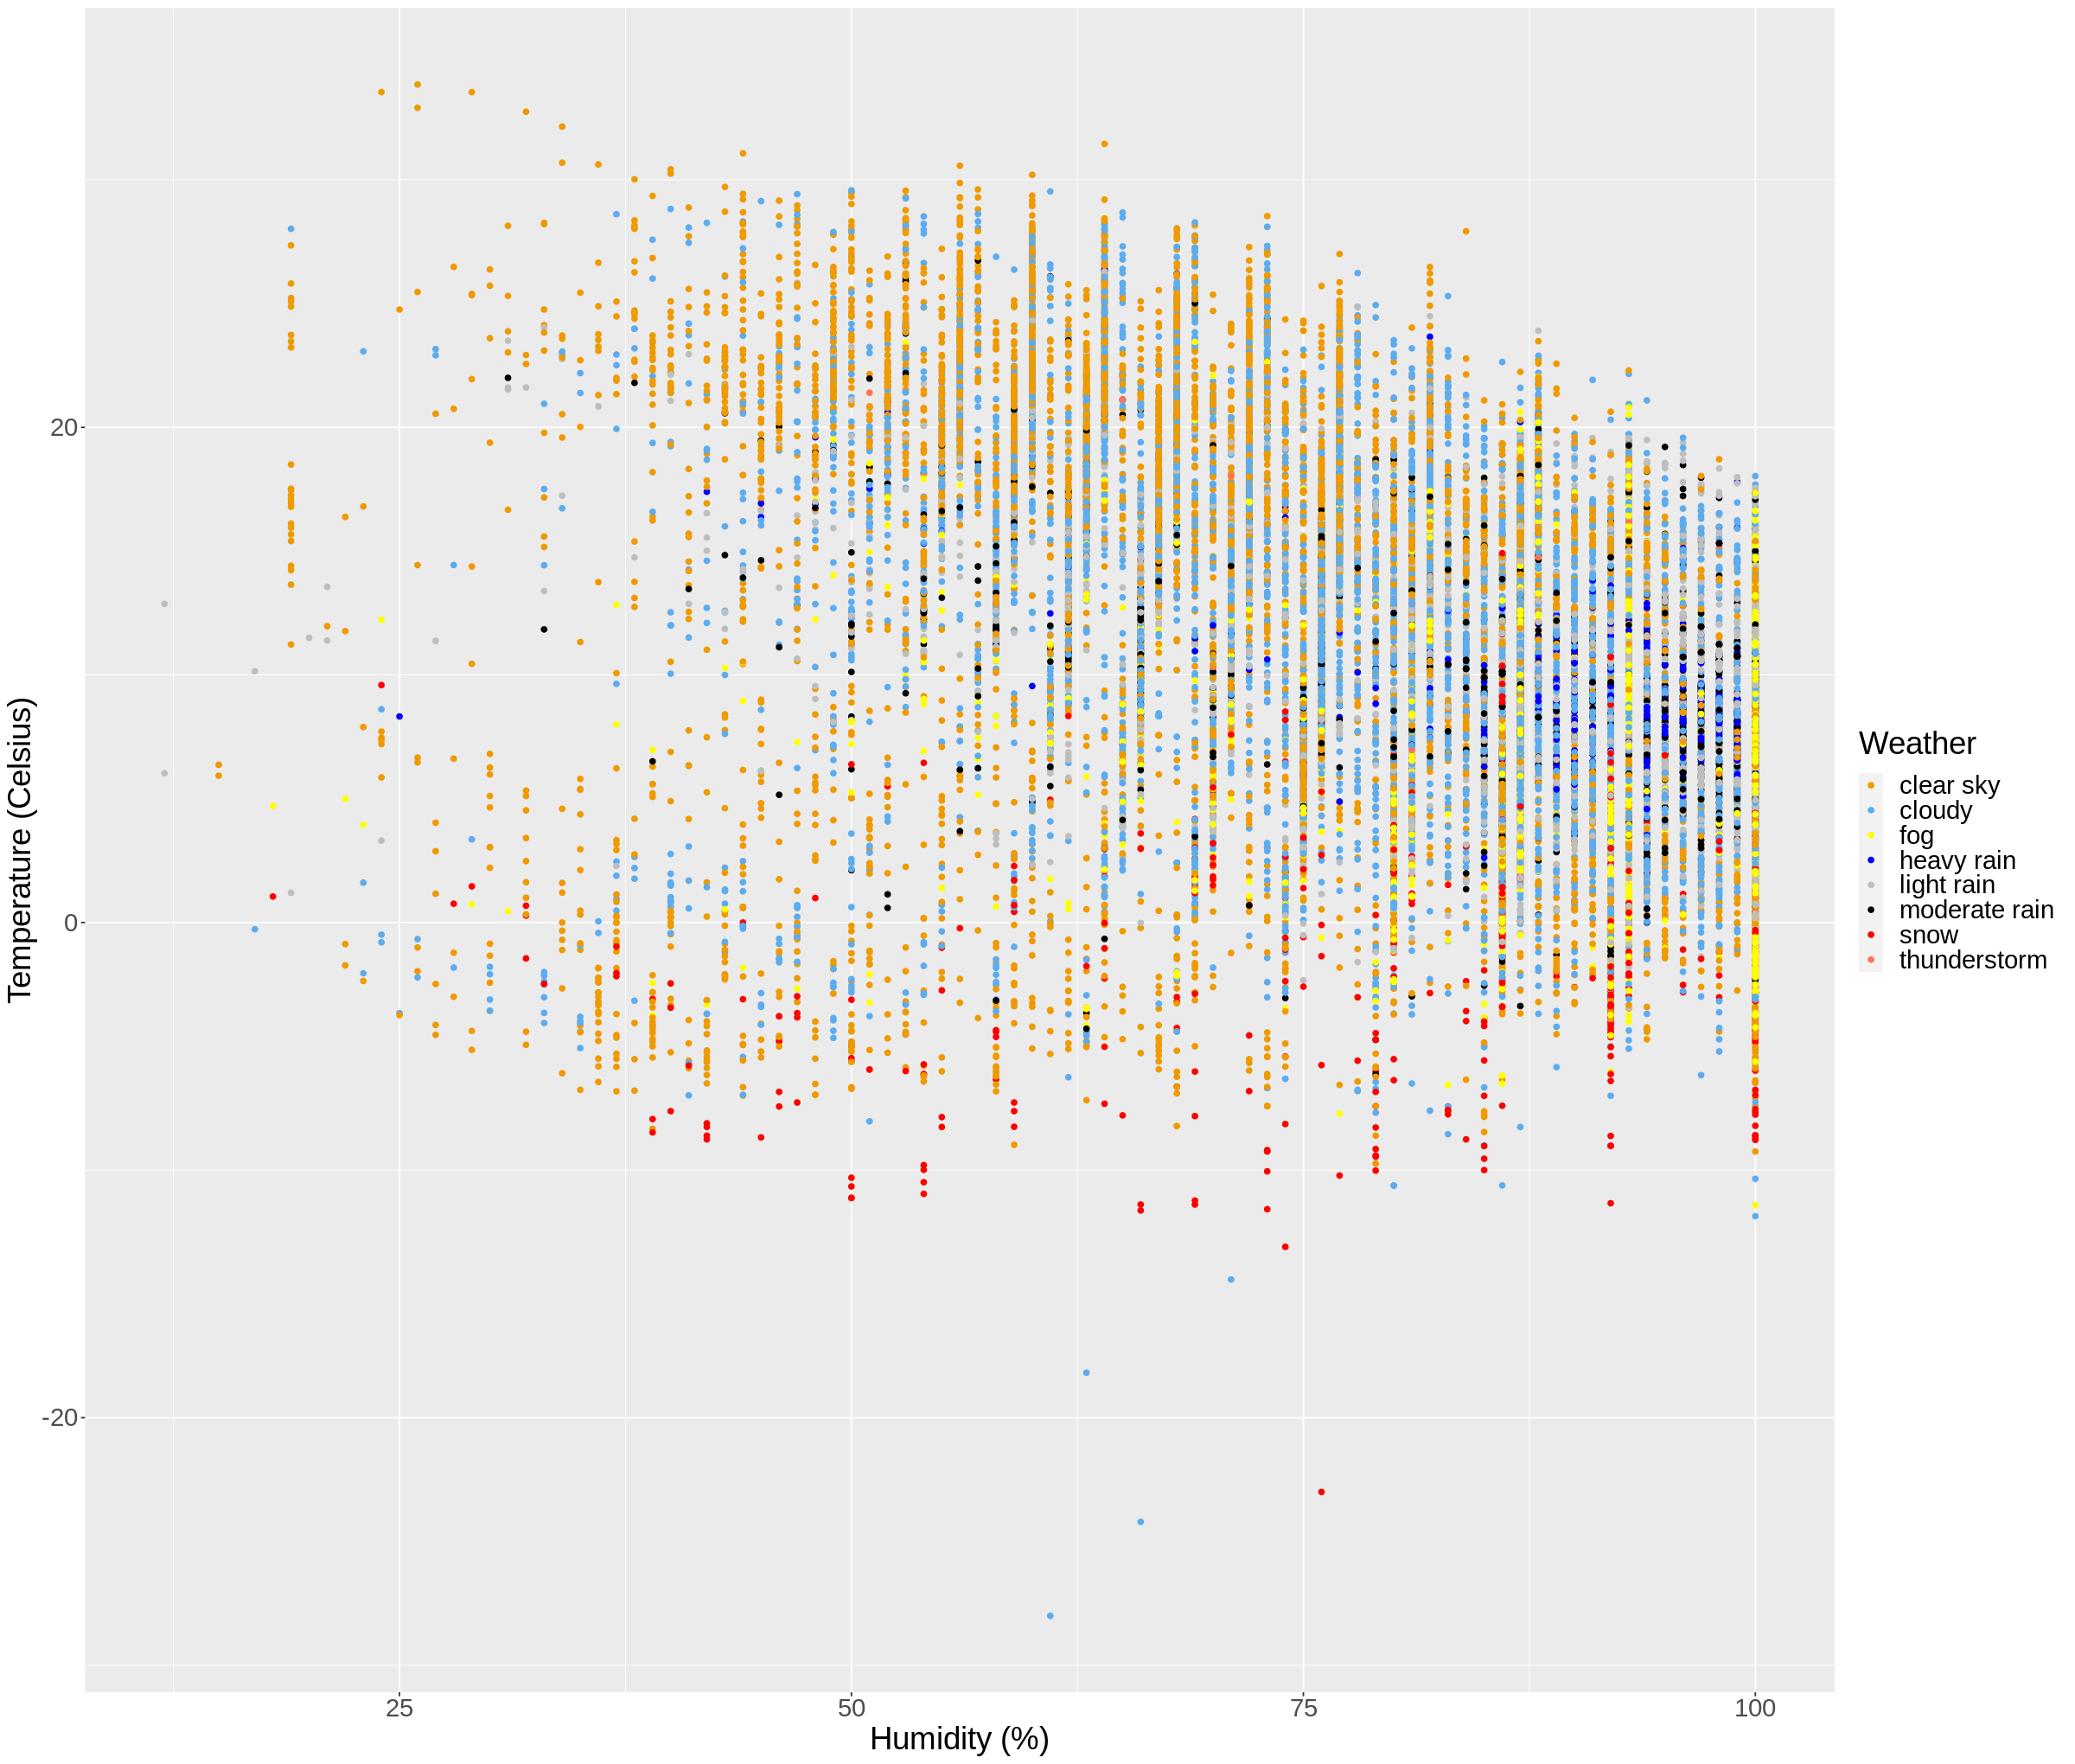

In [6]:
options(repr.plot.width = 20, repr.plot.height = 17) 

weather_data_plot_temp_vs_hum <- weather_data %>%
  ggplot(aes(x = humidity.pct, y = temperature.c, color = description)) +
  geom_point(alpha = 1.0) +
  labs(x = "Humidity (%)", 
       y = "Temperature (Celsius)",
       color = "Weather") +
  scale_color_manual(labels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm"), 
                     values = c("orange2", "steelblue2", "yellow", "blue", "grey", "grey0", "red", "coral1")) +
  theme(text = element_text(size = 22))
weather_data_plot_temp_vs_hum


Raw temp vs pressure

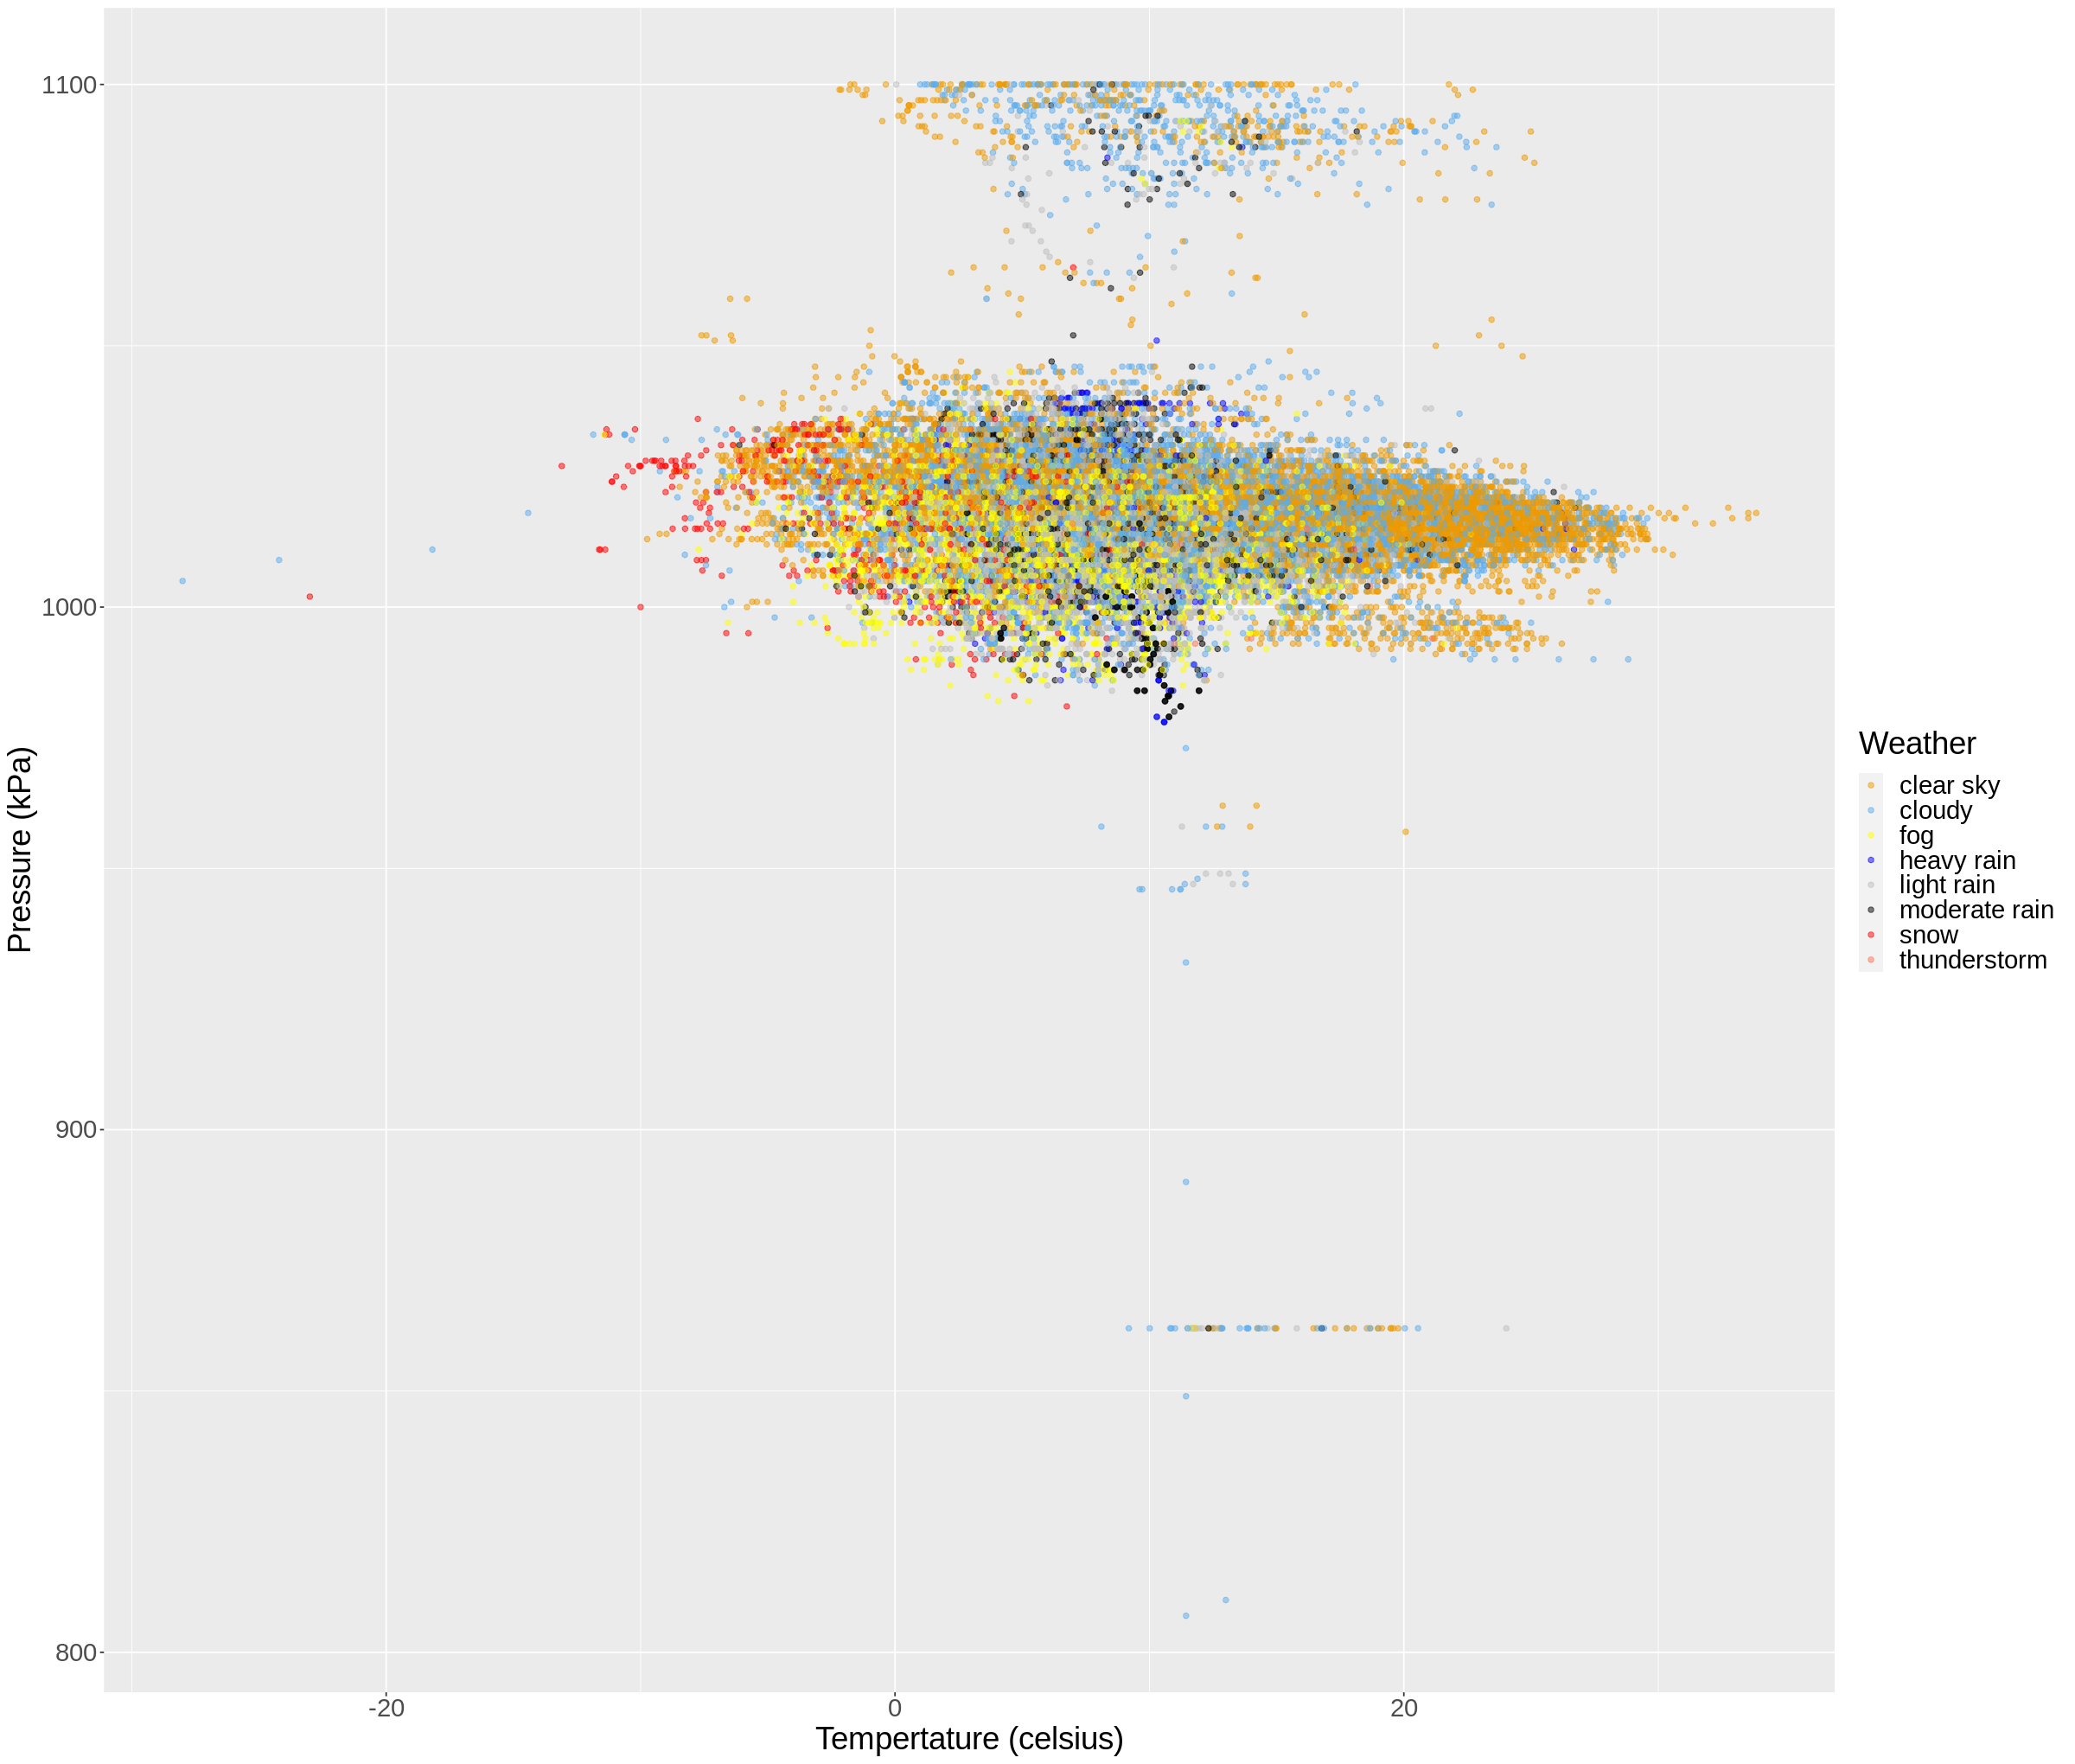

In [7]:
weather_data_plot_temp_vs_prs <- weather_data %>%
  ggplot(aes(x = temperature.c, y = pressure.kpa, color = description)) +
  geom_point(alpha = 0.5) +
  labs(x = "Tempertature (celsius)", 
       y = "Pressure (kPa)",
       color = "Weather") +
  scale_color_manual(labels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm"), 
                     values = c("orange2", "steelblue2", "yellow", "blue", "grey", "grey0", "red", "coral1")) +
  theme(text = element_text(size = 22))
weather_data_plot_temp_vs_prs

Factor seperated plot

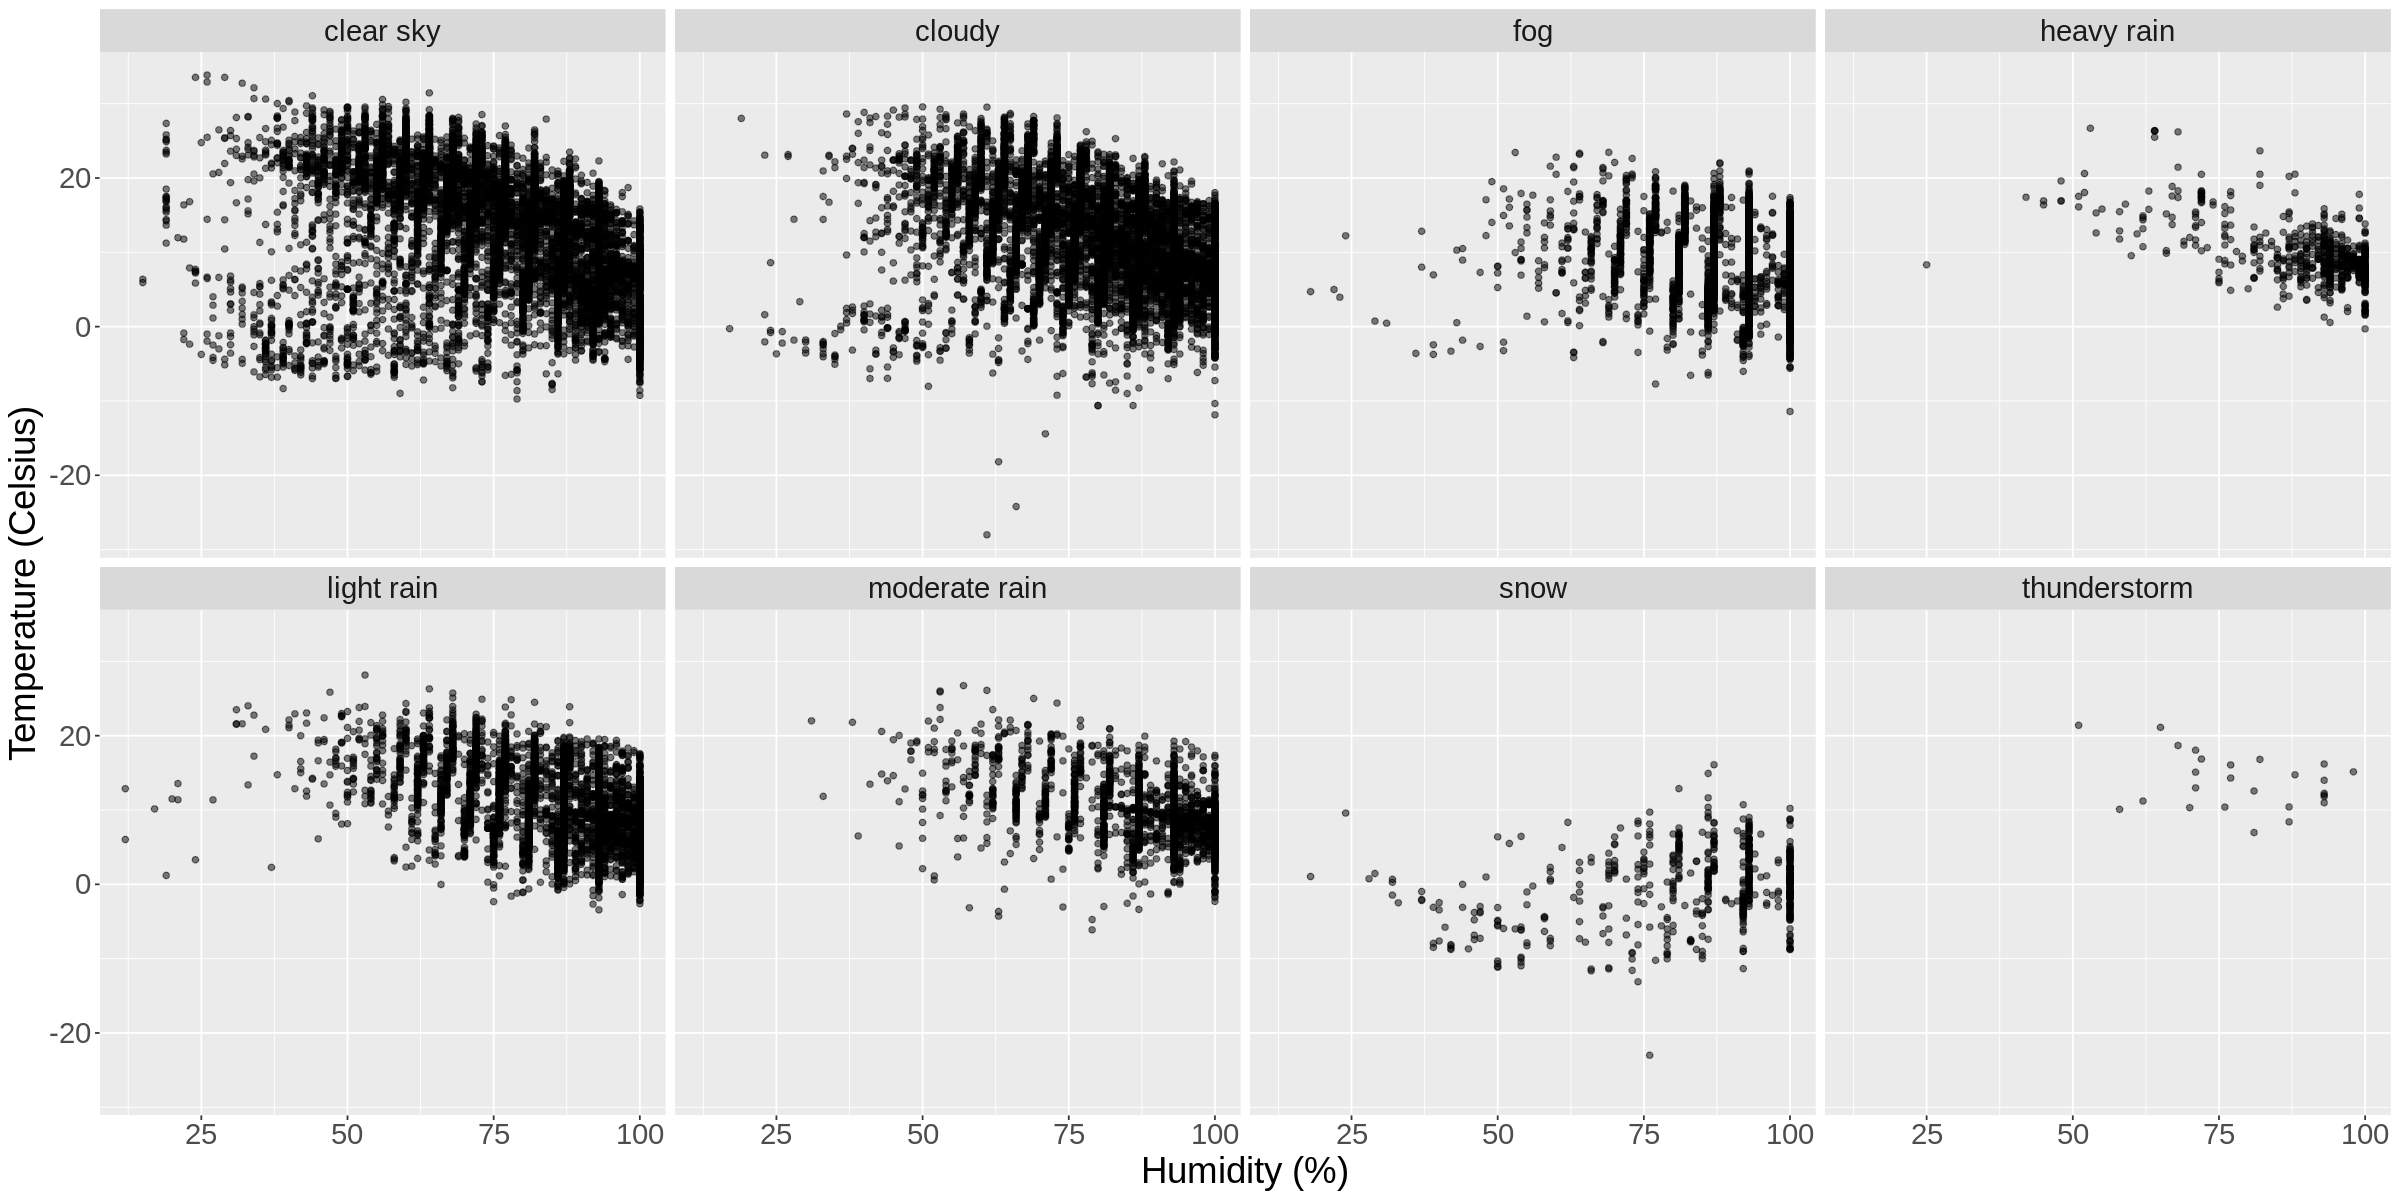

In [8]:
options(repr.plot.width = 20, repr.plot.height = 10) 

weather_data_plot_fct <- weather_data %>%
  ggplot(aes(x = humidity.pct, y = temperature.c)) +
  geom_point(alpha = 0.5) +
  labs(x = "Humidity (%)", 
       y = "Temperature (Celsius)",
       color = "Weather") +
  facet_wrap(~ factor(description, levels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm")), ncol = 4) +
  theme(text = element_text(size = 22))
weather_data_plot_fct


Pressure colour scale:

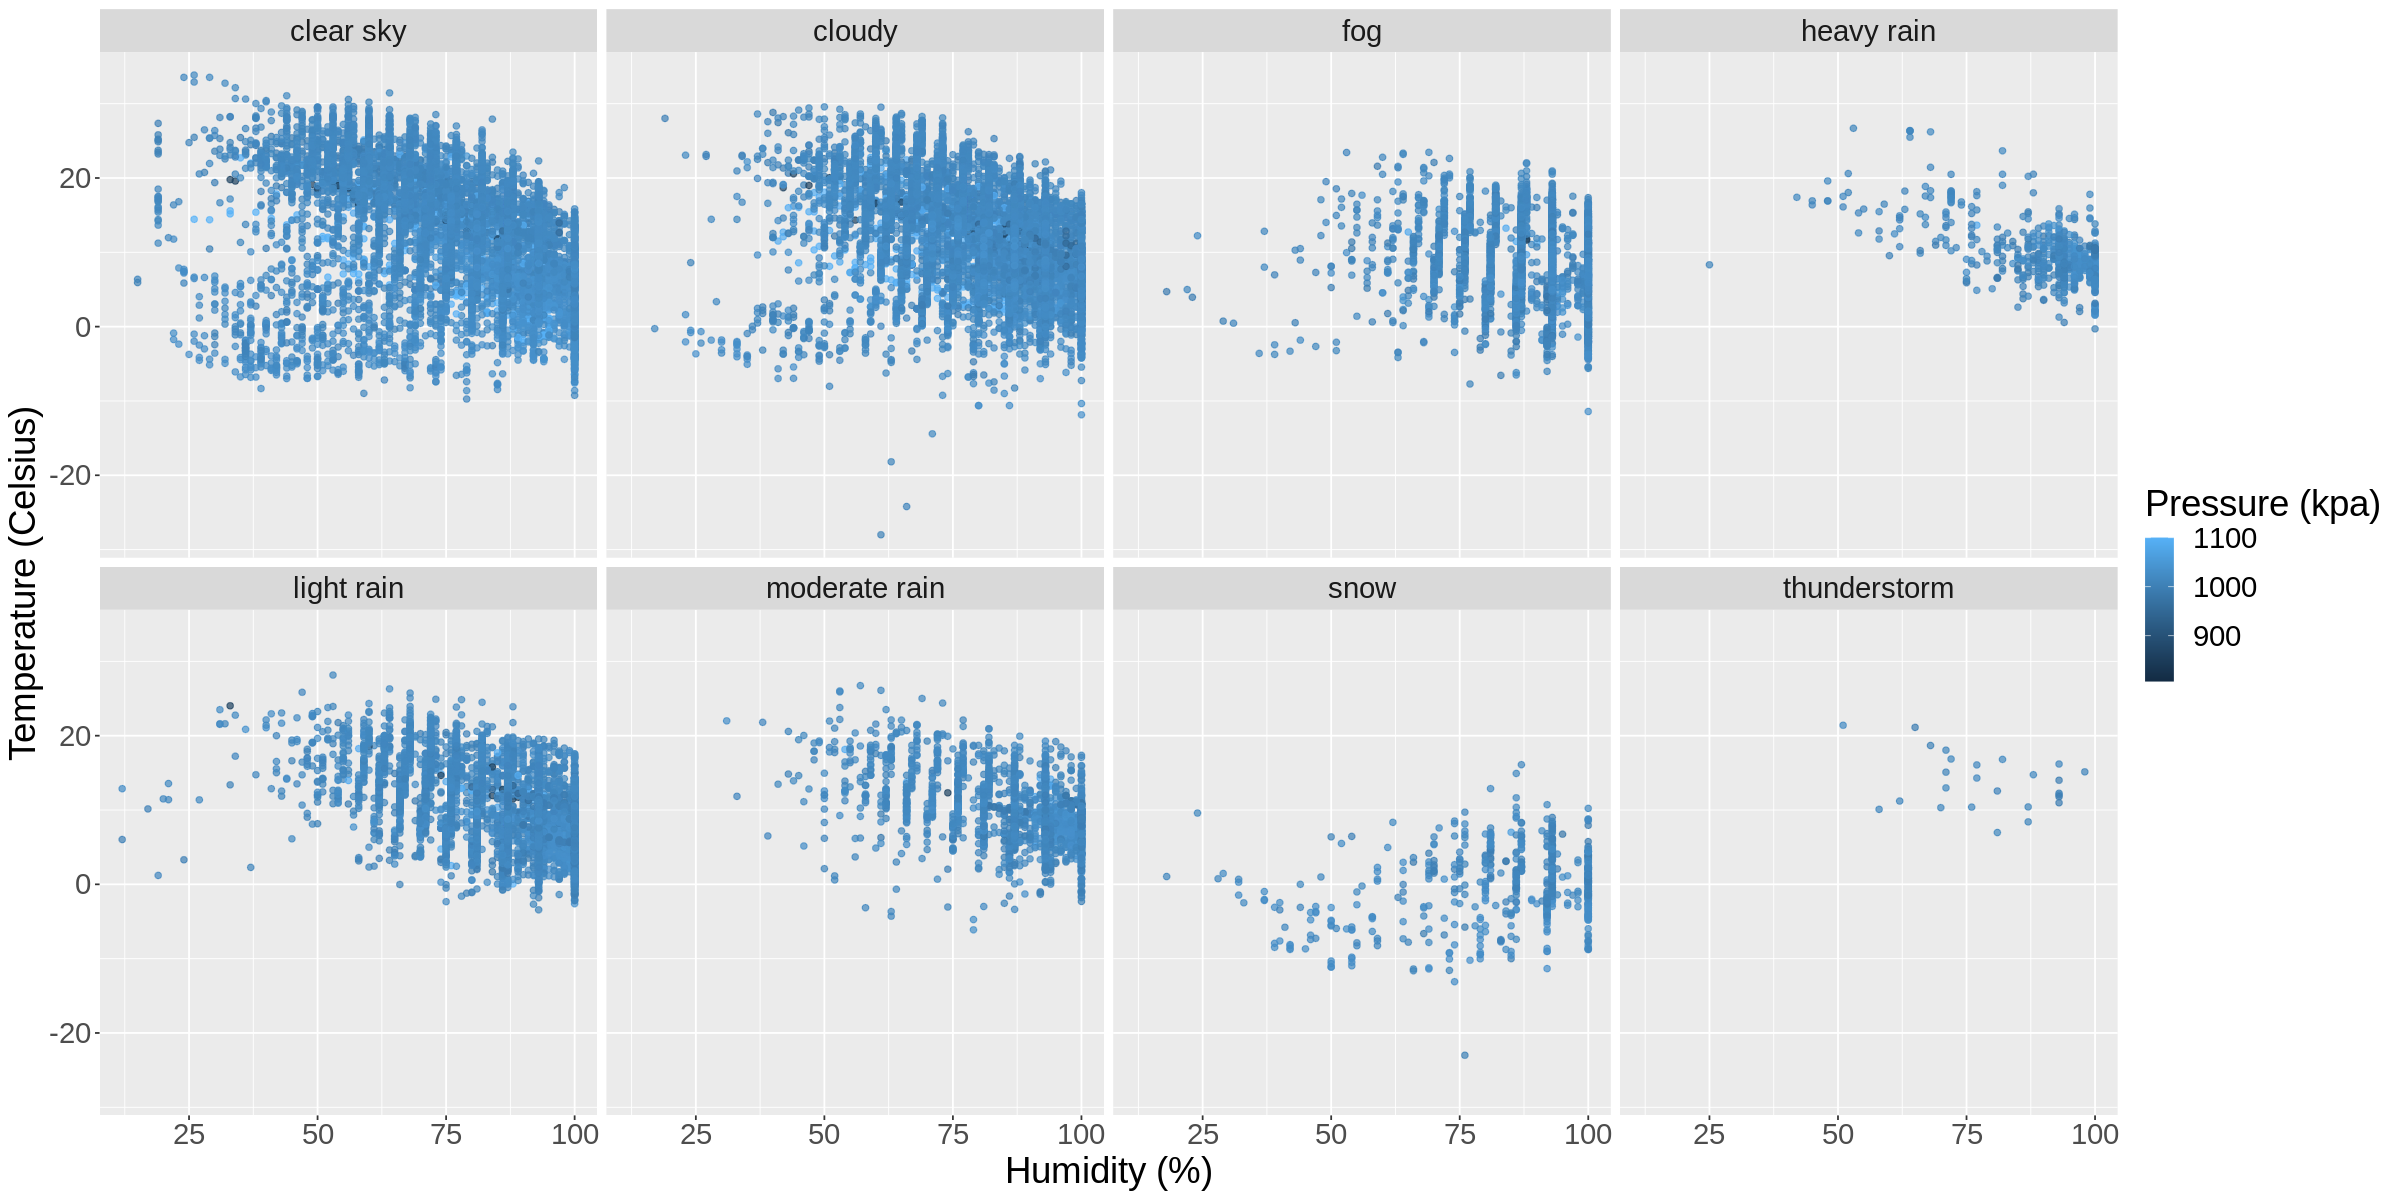

In [10]:
options(repr.plot.width = 20, repr.plot.height = 10) 

weather_data_plot_fct <- weather_data %>%
  ggplot(aes(x = humidity.pct, y = temperature.c, colour = pressure.kpa)) +
  geom_point(alpha = 0.7) +
  labs(x = "Humidity (%)", 
       y = "Temperature (Celsius)",
       color = "Pressure (kpa)") +
  facet_wrap(~ factor(description, levels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "snow", "thunderstorm")), ncol = 4) +
  theme(text = element_text(size = 22))
weather_data_plot_fct

Histogram approach:

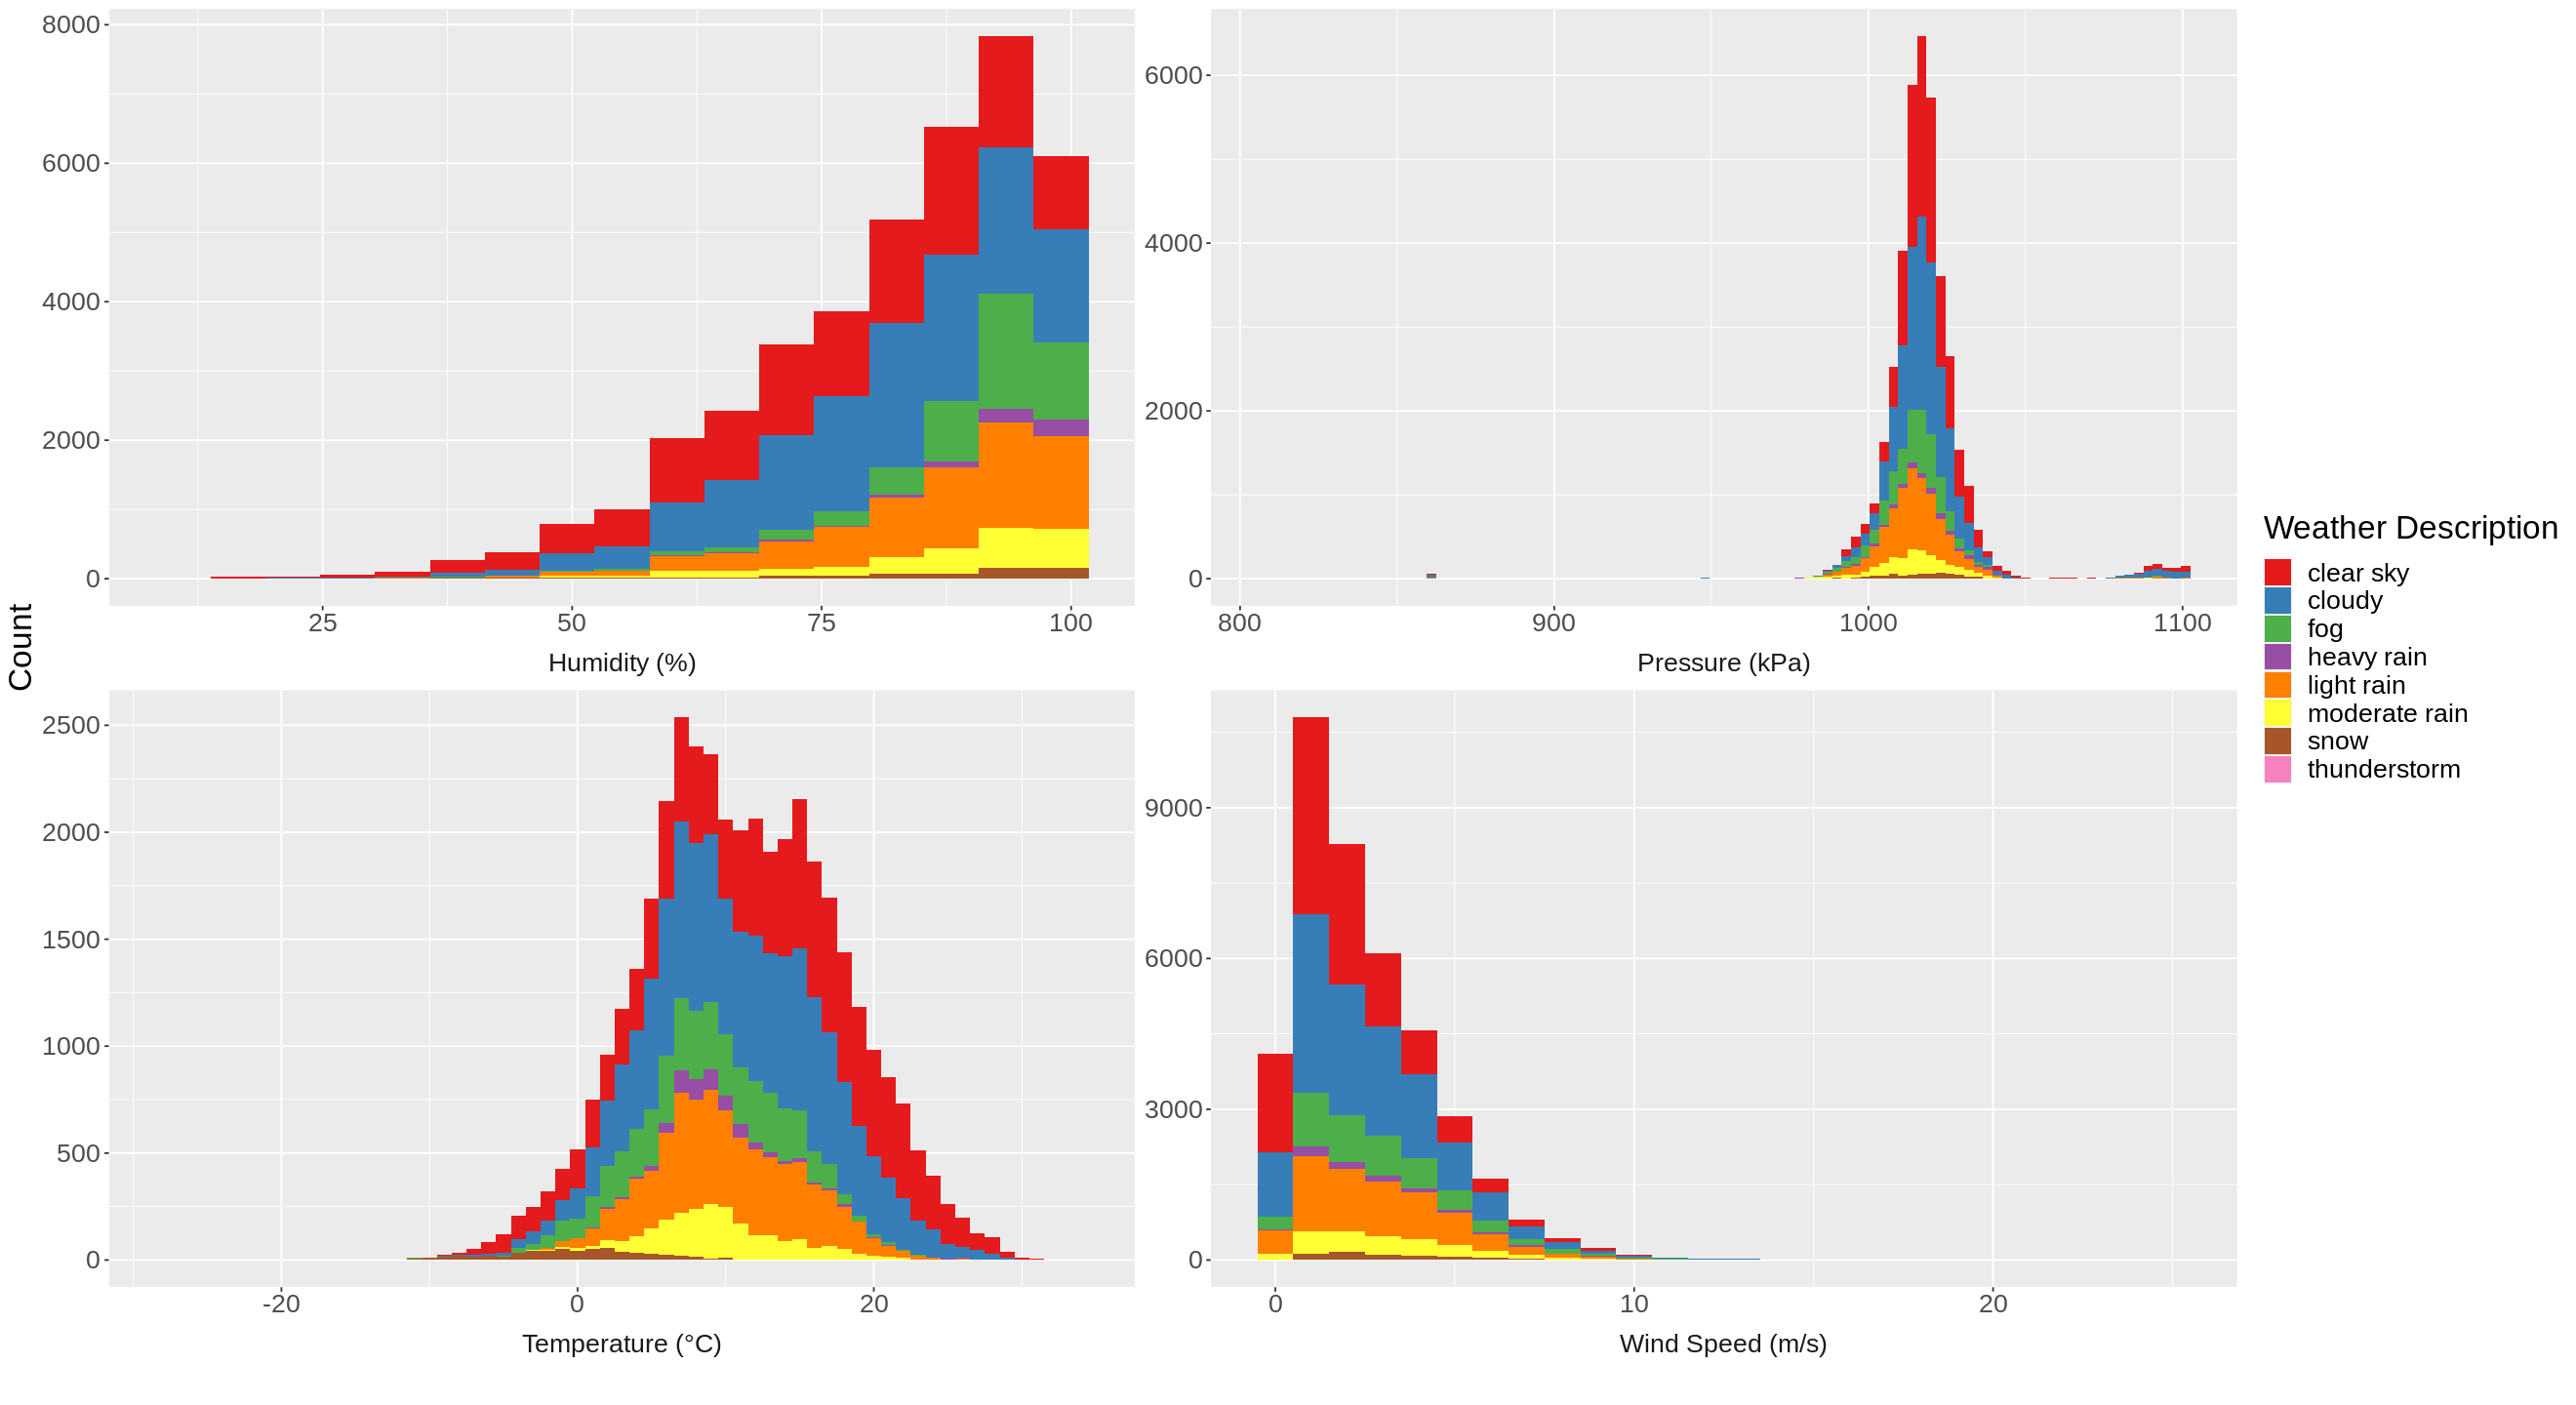

In [90]:
options(repr.plot.width = 22, repr.plot.height = 12) 

hist_data = pivot_longer(weather_data, c(temperature.c, pressure.kpa, humidity.pct, wind_speed.ms), 
                    names_to = "measurement", values_to = "value")

hist_plot = ggplot(hist_data, aes(x = value, fill = description)) +
                    geom_histogram(data = subset(hist_data, measurement == "humidity.pct"), binwidth = 5.5) + 
                    geom_histogram(data = subset(hist_data, measurement == "pressure.kpa"), binwidth = 3) + 
                    geom_histogram(data = subset(hist_data, measurement == "temperature.c"), binwidth = 1) + 
                    geom_histogram(data = subset(hist_data, measurement == "wind_speed.ms"), binwidth = 1) + 
                    facet_wrap(~measurement, scales = "free", strip.position = "bottom",  
                               labeller = as_labeller(c("humidity.pct" = "Humidity (%)", "pressure.kpa" = "Pressure (kPa)", "temperature.c" = "Temperature (°C)", "wind_speed.ms" = "Wind Speed (m/s)"))) +
                    labs(x = "", y = "Count", fill = "Weather Description") + 
                    scale_fill_brewer(palette = "Set1") +
                    theme(strip.placement = "outside", strip.background = element_blank(), text = element_text(size = 20))

hist_plot

In [120]:
nrow(weather_data)

nrow(filter(weather_data, description == "clear sky"))
nrow(filter(weather_data, description == "cloudy"))
nrow(filter(weather_data, description == "fog"))
nrow(filter(weather_data, description == "heavy rain"))
nrow(filter(weather_data, description == "light rain"))
nrow(filter(weather_data, description == "moderate rain"))
nrow(filter(weather_data, description == "snow"))
nrow(filter(weather_data, description == "thunderstorm"))
nrow(filter(weather_data, !(description == "clear sky" | description == "cloudy" | description == "fog" | description == "heavy rain" | description == "light rain" | description == "moderate rain" | description == "snow" | description == "thunderstorm")))


sums = group_by(weather_data, description) %>%
summarize(n = n())
sum(sums$n)

pull (sums, n)
12061 + 13358 + 4580 + 662+6518+2224+608+26


[1] 40037

[1] 12061

[1] 13358

[1] 4580

[1] 662

[1] 6518

[1] 2224

[1] 608

[1] 26

[1] 0

`summarise()` ungrouping output (override with `.groups` argument)



[1] 40037

[1] 12061 13358  4580   662  6518  2224   608    26

[1] 40037